# Symbolic computation with `sympy`

Symbolic (as opposed to numeric) computation can be accomplished in Python using the `sympy` package. The `init_printing` function allows the output to be formatted using *MathJax*.

In [1]:
from sympy import init_printing, Symbol, symbols, Function, sin, cos, tan, exp, oo, Eq

init_printing()

We must explicitly state which Python variables correspond to mathematical symbols:

In [2]:
x = Symbol('x')

sin(x+1)/exp(x)

In [3]:
t0 = Symbol('theta_0')

sin(t0+1)/exp(t0)

In the above, `theta_0` produces the symbol $\theta_0$ in *LaTeX*. `sympy` understands this and displays the symbol correctly.

The `symbols` function (note the lowercase "s") allows us to define several symbols at once:

In [4]:
a, b, c, x, y, z = symbols('a, b, c, x, y, z')

# Solving equations

A symbolic expression (equal to zero) can be solved for any one of the symbols it contains using the `solve` function:

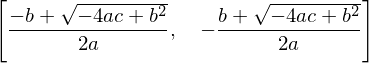

In [5]:
from sympy import solve

solve(a*x**2 + b*x + c, x)

By default, `solve` presents its solutions as a list, but a dictionary presentation is also available:

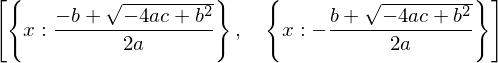

In [6]:
solve(a*x**2 + b*x + c, x, dict=True)

We can also solve a system of equations:

In [7]:
solve([x + y - 2*z, y**2 - 4*z], [x, y], dict=True)

Rather than assuming all expressions are equal to zero, we can explicitly create symbolic equations if we wish:

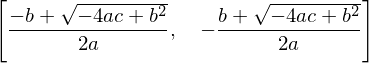

In [8]:
solve(Eq(a*x**2 + b*x, -c), x)

# Calculus

In [9]:
from sympy import diff, integrate

To take derivatives, we use the `diff` function, specifying the variable we wish to differentiate with respect to:

In [10]:
diff(cos(x), x)

To take the second derivative, we differentiate with respect to $x$ twice:

In [11]:
diff(cos(x), x, x)

Integration is similar:

In [12]:
integrate(cos(x), x)

Definite integrals are performed as follows. Let's compute

$$
    \int_0^\infty e^{-x}\,dx.
$$

In [13]:
integrate(exp(-x), (x, 0, oo))

**Note:** Sympy uses a double lowercase o ("oh") to denote infinity, as seen above.

# Differential equations

In [14]:
from sympy import Derivative, dsolve

Differential equations can be solved directly (`sympy` uses several methods under the hood).

First, we must specify that $f$ is some (as yet unknown) function:

In [15]:
f = Function('f')
t = Symbol('t')

Now, `Derivative(f(t), t)` and `Derivative(f(t), t, t)` represent the first and second derivatives, respectively.

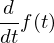

In [16]:
Derivative(f(t), t)

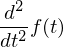

In [17]:
Derivative(f(t), t, t)

Alternatively, you can use `f(t).diff(t)` and `f(t).diff(t, t)`.

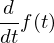

In [18]:
f(t).diff(t)

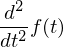

In [19]:
f(t).diff(t, t)

Let's solve the second-order differential equation
$$
    f''(t)-f'(t)-6f(t)=e^t.
$$
for $f(t)$ using the `dsolve` function.

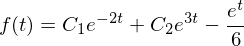

In [20]:
dsolve(Derivative(f(t), t, t) - Derivative(f(t), t) - 6*f(t) - exp(t), f(t))

Now suppose we want to find the particular solution satisfying the initial conditions
$$
    f(0)=f'(0)=0.
$$

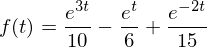

In [21]:
conditions = {f(0): 0, Derivative(f(t),t).subs(t, 0): 0} # a Python dictionary

dsolve(Derivative(f(t), t, t) - Derivative(f(t), t) - 6*f(t) - exp(t), f(t), ics=conditions)

**Note:** In the above, `.subs(t, 0)` substituted the value 0 into the mathematical expression for $f'(t)$.

Actually, we can use `subs` more generally:

In [22]:
F = x**2 + x + 2
F

In [23]:
F.subs(x, t)

In [24]:
F.subs(x, 4)

# Shot put problem revisited

Recall that the trajectory of a projectile fired from the origin and subject to earth's gravity is given by
$$
    y=(\tan\theta_0)x-\frac{gx^2}{2(v_0\cos\theta_0)^2},
$$
where $v_0$ is the launch speed and $\theta_0$ is the launch angle (above the horizontal). When launched from the ground and neglecting air resistance, the horizontal distance traveled by the projectile (its *range*) was maximised by taking $\theta_0=45^\circ$.

Let us now compute the optimal launch angle when the projectile is fired from a height $h$ above the ground. If the projectile is fired from the origin, the point of impact with the ground is given by $(x,y)=(R,-h)$. Hence, the range $R$ can be determined from the equation
$$
    0=h+(\tan\theta_0)R-\frac{gR^2}{2(v_0\cos\theta_0)^2}.\tag{1}
$$
Considering (1) as the (implicit) definition of the function $R(\theta_0)$, we can differentiate both sides with respect to $\theta_0$. In order for `sympy` to perform the implicit differentiation correctly, we must specify that $R$ is a function of $\theta_0$.

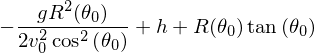

In [25]:
h, v0, theta0, g = symbols('h, v_0, theta_0, g')
R = Function('R')(theta0)

RHS = h + tan(theta0)*R - g*R**2/(2*(v0*cos(theta0))**2)
RHS

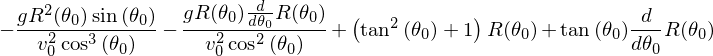

In [26]:
d = diff(RHS, theta0)
d

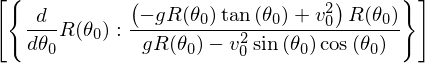

In [27]:
d_R_d_theta0 = solve(d, R.diff(theta0), dict=True) # list containing only one solution
d_R_d_theta0

Let's store the above expression on its own, rather than wrapped in a dictionary and a list:

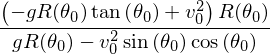

In [28]:
d_R_d_theta0 = solve(d, R.diff(theta0))[0] # list containing only one solution
d_R_d_theta0

We maximise the range by setting the above derivative equal to zero.

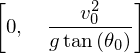

In [29]:
R_sols = solve(d_R_d_theta0, R)
R_sols

So, for maximum $R(\theta_0)$,
$$
    R(\theta_0)=\frac{v_0^2}{g\tan{\theta_0}}.
$$
Let's sub this back into (1) and then solve for $\theta_0$:

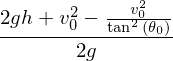

In [30]:
R_sol = R_sols[1]
rhs = RHS.subs(R, R_sol).simplify()
rhs

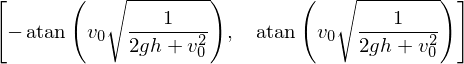

In [31]:
sols = solve(rhs, theta0)
sols

Sanity check: when $h=0$, we have $\theta_0=\tan^{-1}(1)=45^\circ$, so we take the latter solution:

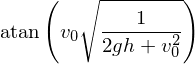

In [32]:
sol = sols[1]
sol

**Observe:** the taller the athlete, the smaller the optimal launch angle. Let's plug in some realistic numbers for Olympic shot put:

In [33]:
import math

# show answer in degrees, rather than radians:
math.degrees(sol.subs([(h, 1.8), (v0, 38), (g, 9.81)]))

As we can see, the height of the athlete does not greatly impact the optimal launch angle.

# Problems

## Problem 1

Use `sympy` to derive all five equations of motion for constant acceleration (recall that we have already done this by hand in class).

In [34]:
x, x0, v, v0, a, t = symbols('x, x_0, v, v_0, a, t')
x_ = Function('x')
v_ = Function('v')

conditions = {v_(0): v0}
eq1 = dsolve(Derivative(v_(t), t) - a, v_(t), ics=conditions)
eq1

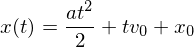

In [35]:
conditions = {x_(0): x0, Derivative(x_(t),t).subs(t, 0): v0}
eq2 = dsolve(Derivative(x_(t), t, t) - a, x_(t), ics=conditions)
eq2

Swap out the functions for symbols to facilitate algebraic manipulation:

In [36]:
eq1 = eq1.subs(v_(t), v)
eq1

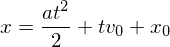

In [37]:
eq2 = eq2.subs(x_(t), x)
eq2

Eliminating each of the remaining three variables gives the three remaining equations of motion:

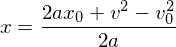

In [38]:
# Eliminate t
eq2.subs(t, solve(eq1, t)[0]).simplify()

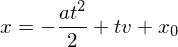

In [39]:
# Eliminate v0
eq2.subs(v0, solve(eq1, v0)[0]).simplify()

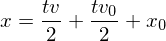

In [40]:
# Eliminate a
eq2.subs(a, solve(eq1, a)[0]).simplify()

## Problem 2

Let us now consider the impact of air resistance on the optimal launch angle for the shot put. Suppose, as above, that the shot put is launched from a height of $h=1.8$ m above the ground with speed $v_0=38$ m s$^{-1}$ at an angle $\theta_0$ above the horizontal. Suppose the shot put has a mass of 4 kg, is 10 cm in diameter and has a drag coefficient of $C=0.47$. Assume the density of air is 1.225 kg m$^{-3}$ and acceleration due to gravity at the earth's surface is $g=9.81$ m s$^{-2}$.

**(a)** Choose a few different values of $\theta_0$, and, for each one, numerically compute the trajectory of the shot put (using the `odeint` function). Plot the trajectories on the same graph and compute the approximate range for each trajectory.

<IPython.core.display.Javascript object>


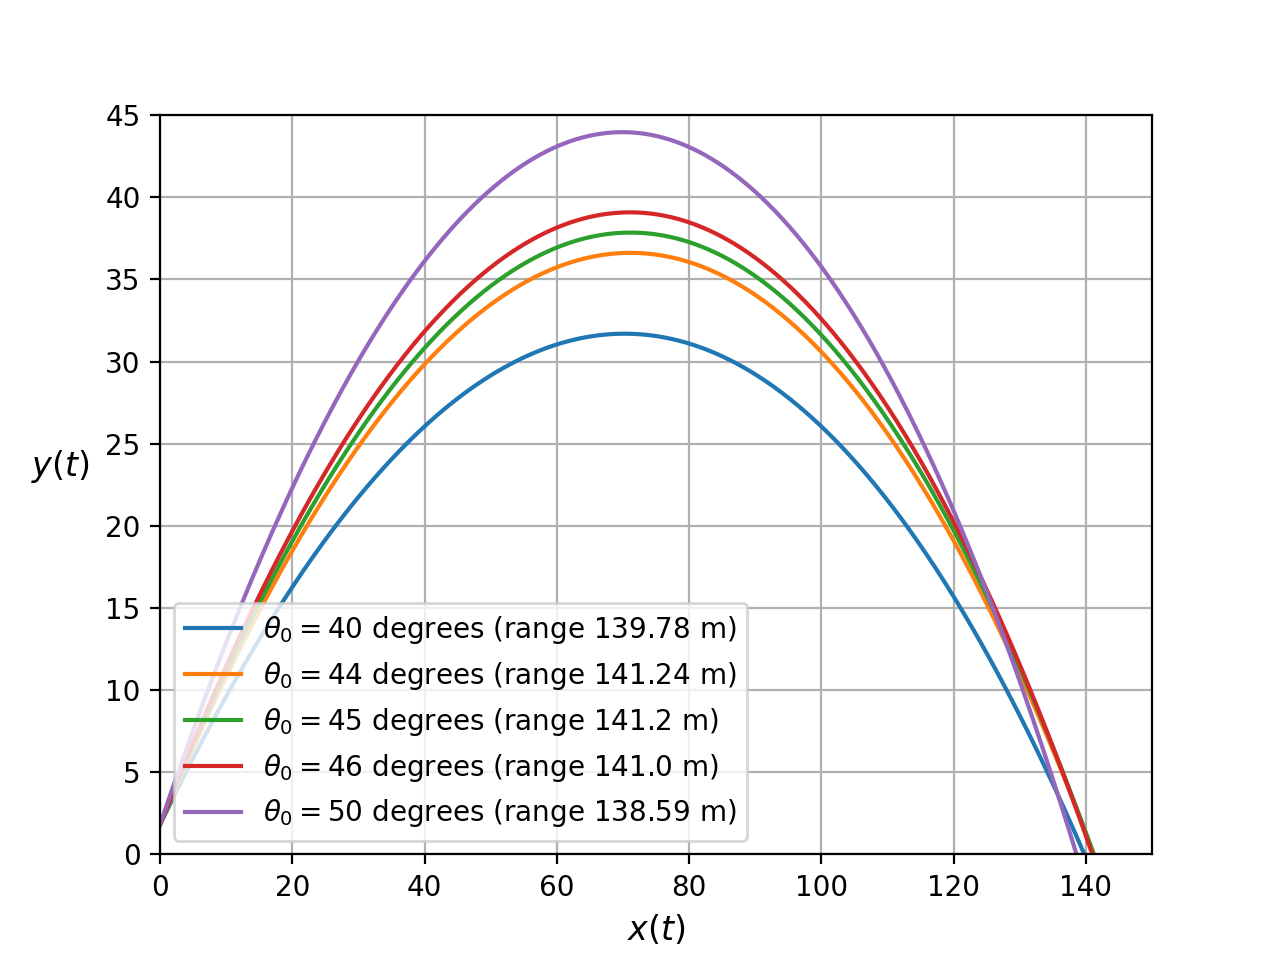

In [42]:
import math
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

%matplotlib notebook

h = 1.8
v0 = 38
m = 4
R = 0.05 # radius of shot put
C = 0.47
rho = 1.225 # density of air
g = 9.81

# initial conditions for the system
def U0(theta0):
    r0 = np.array((0, h))
    p0 = m*v0*np.array((math.cos(math.radians(theta0)), math.sin(math.radians(theta0))))
    
    # odeint only works on one-dimensional arrays
    return np.array((r0, p0)).flatten()

def dU_dt(U, t):
    r, p = U[0:2], U[2:4]
    
    # velocity vector
    v = p / m
    
    # definition of velocity
    dr = v
    
    # gravitational force on the shot put
    Fg = np.array((0, -m*g))
    
    # drag force
    def drag(v):
        return 0.5*C*rho*math.pi*R**2*v**2
        
    Fd = - np.array((drag(v[0]), drag(v[1]))) # drag force vector
    
    # total force on the shot put
    F = Fg + Fd
    
    # the rate of change of momentum equals force
    dp = F
    
    return np.array((dr, dp)).flatten()

t_range = (0, 6)
plt.figure('Shot put trajectory')
plt.xlabel('$x(t)$', fontsize = 12)
plt.ylabel('$y(t)$', fontsize = 12, labelpad = 16).set_rotation(0)
plt.grid(True)
plt.xlim(0, 150)
plt.ylim(0, 45) # cut of the trajectory below the ground

t = np.linspace(*t_range, 12800) # the * operator unpacks the tuple

def computeRange(r): # compute the range, given the trajectory
    m, n = np.shape(r)
    for j in range(n):
        # the first negative y-value you find, return the x-value
        if r[1, j] < 0:
            return r[0, j]
    return r[0, -1] # if no negative y-value found, return the final x-value

for theta0 in [40, 44, 45, 46, 50]:
    U = odeint(dU_dt, U0(theta0), t).T # transpose the array

    # unpack the odeint solution into the position and momentum vectors
    r, p = U[0:2], U[2:4]
    
    plt.plot(*r, label = r'$\theta_0=$' + str(theta0)
             + ' degrees (range ' + str(round(computeRange(r),2)) + ' m)')

plt.legend(loc = 'lower left')
plt.show()

**(b)** [*Difficult problem*] Programmatically compute the range for many different values of $\theta_0$ and hence find an approximation for the optimal $\theta_0$.

<IPython.core.display.Javascript object>


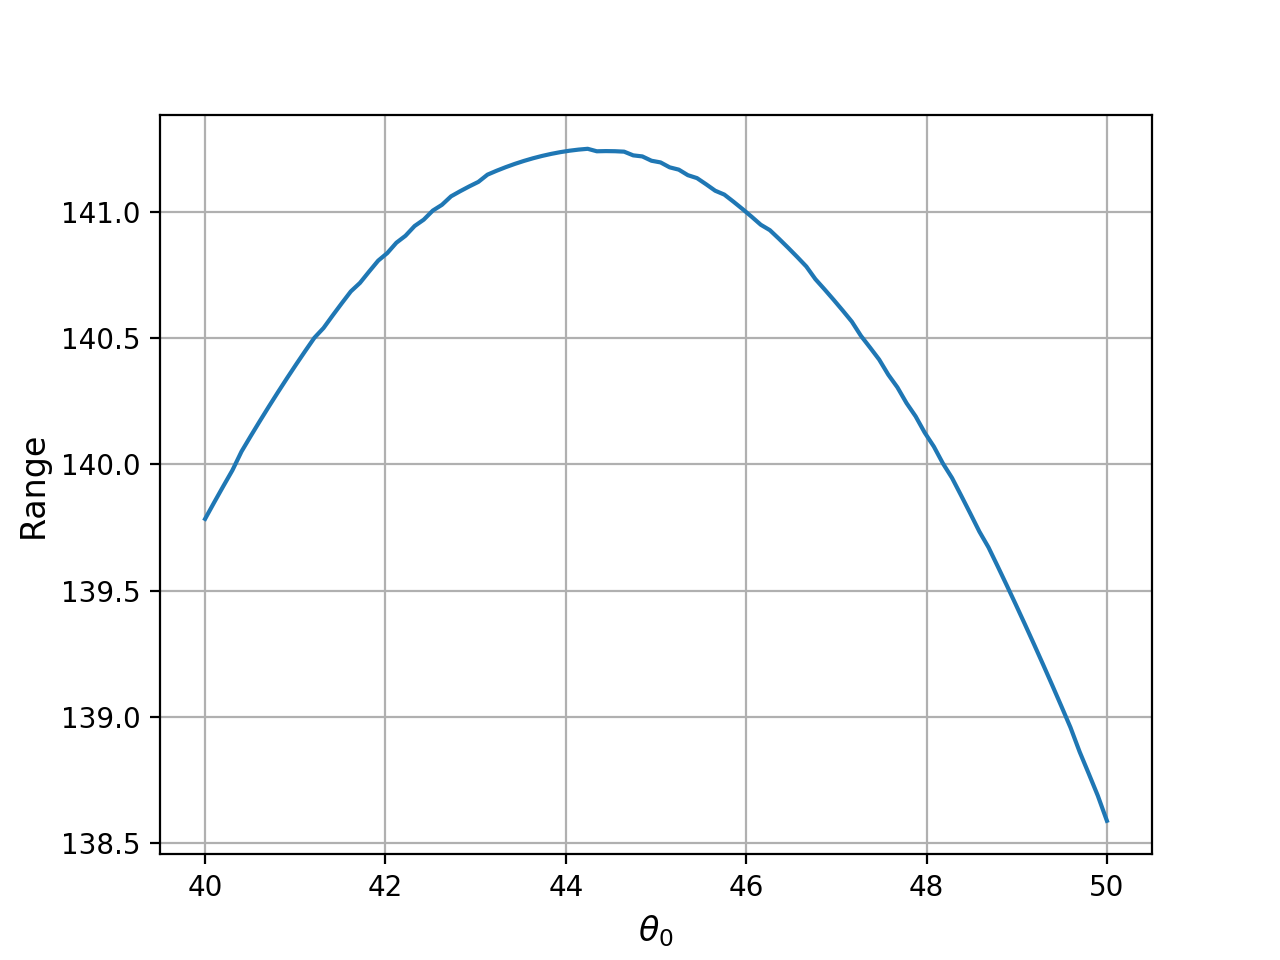

Optimal launch angle: 44.24 degrees, Range: 141.25 m


In [43]:
%matplotlib notebook

# list of launch angles
angles = np.linspace(40, 50, 100) # 100 different angles between 40 and 50 degrees

# construct a corresponding list of ranges
ranges = []
for theta0 in angles:
    U = odeint(dU_dt, U0(theta0), t).T # transpose the array

    # unpack the trajectory
    r = U[0:2]
    
    ranges.append(computeRange(r))
    
plt.figure('Range vs launch angle')
plt.xlabel(r'$\theta_0$', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.grid(True)

plt.plot(angles, ranges)

plt.show()

# compute the optimal launch angle
for i in range(len(angles)):
    if ranges[i] == max(ranges):
        print('Optimal launch angle:', round(angles[i], 2), 'degrees, Range:', round(ranges[i], 2), 'm')